In [54]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import yfinance as yf

# Step 1: Download CRV's data for the last 1 week (replace 'your_data_source' with your actual data source)
# Assuming data has columns 'Date' and 'CRV_Price'
data = yf.download("CRV-USD", start="2024-03-02", end="2024-03-09", interval="1h")

[*********************100%%**********************]  1 of 1 completed

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-03-02 00:00:00+00:00,0.653060,0.657586,0.652534,0.657586,0.657586,0
2024-03-02 01:00:00+00:00,0.658090,0.658090,0.643794,0.653875,0.653875,1486368
2024-03-02 02:00:00+00:00,0.654596,0.655787,0.651084,0.654087,0.654087,0
2024-03-02 03:00:00+00:00,0.654482,0.667020,0.651630,0.667020,0.667020,388976
2024-03-02 04:00:00+00:00,0.667081,0.674129,0.658150,0.658150,0.658150,3334688
...,...,...,...,...,...,...
2024-03-08 19:00:00+00:00,0.762089,0.762468,0.758402,0.761854,0.761854,689088
2024-03-08 20:00:00+00:00,0.761899,0.765171,0.758888,0.763381,0.763381,0
2024-03-08 21:00:00+00:00,0.763422,0.768282,0.763422,0.763784,0.763784,0


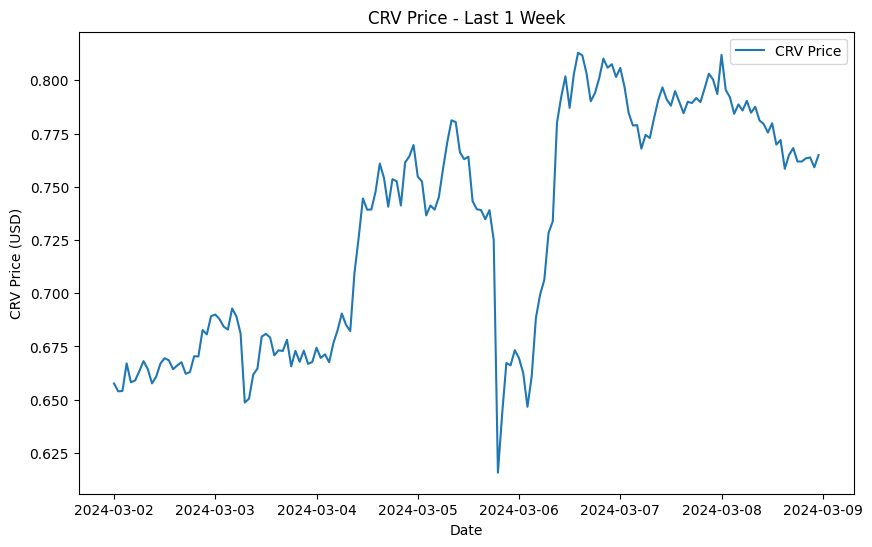

Mean Price: 0.7308818779530979
Variance Price: 0.002970681844031574


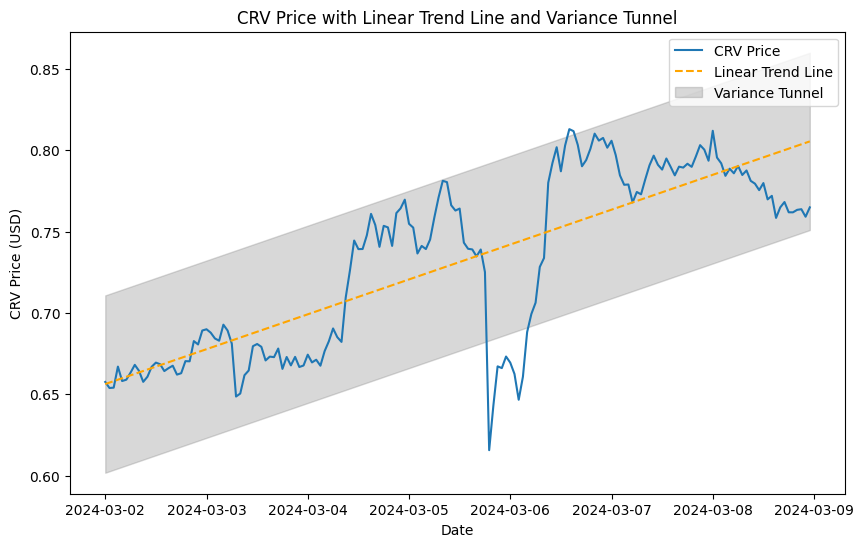

In [55]:

data = data["Close"]

# Step 2: Plot the last 1-week chart of CRV with this data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data, label='CRV Price')
plt.title('CRV Price - Last 1 Week')
plt.xlabel('Date')
plt.ylabel('CRV Price (USD)')
plt.legend()
plt.show()

# Step 3: Calculate the mean and variance of this data
mean_price = data.mean()
variance_price = data.var()

print(f'Mean Price: {mean_price}')
print(f'Variance Price: {variance_price}')

# Step 4: Fit a linear trend line to this curve
X = np.arange(len(data)).reshape(-1, 1)
y = data.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

# Step 5: Create a tunnel of variance around this fitted line
tunnel_upper = model.predict(X) + np.sqrt(variance_price)
tunnel_lower = model.predict(X) - np.sqrt(variance_price)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data.index, data, label='CRV Price')
plt.plot(data.index, model.predict(X), label='Linear Trend Line', linestyle='--', color='orange')
plt.fill_between(data.index, tunnel_upper.flatten(), tunnel_lower.flatten(), color='gray', alpha=0.3, label='Variance Tunnel')
plt.title('CRV Price with Linear Trend Line and Variance Tunnel')
plt.xlabel('Date')
plt.ylabel('CRV Price (USD)')
plt.legend()
plt.show()